In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')

C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
churn_df = pd.read_csv('Churn_Modelling.csv')
churn_df = churn_df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)
churn_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


`Surname`: The last name of the customer (for privacy reasons, consider anonymizing this data if not already done).
</br>
`CreditScore`: The customer's credit score at the time of data collection.
</br>
`Geography`: The customer's country or region, providing insights into location-based trends in churn.
</br>
`Gender`: The customer's gender.
</br>
`Age`: The customer's age, valuable for demographic analysis.
</br>
`Tenure`: The number of years the customer has been with the bank.
</br>
`Balance`: The customer's account balance.
</br>
`NumOfProducts`: The number of products the customer has purchased or subscribed to.
</br>
`HasCrCard`: Indicates whether the customer has a credit card (1) or not (0).
</br>
`IsActiveMember`: Indicates whether the customer is an active member (1) or not (0).
</br>
`EstimatedSalary`: The customer's estimated salary.
</br>
`Exited`: The target variable, indicating whether the customer has churned (1) or not (0).

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [4]:
def convert_to_category(list_cols):
    for col in list_cols:
        churn_df[col] = churn_df[col].astype('category')

In [5]:
list_cols= ['Geography','Gender','Tenure','HasCrCard','NumOfProducts','IsActiveMember','Exited']
convert_to_category(list_cols)

#Set thứ tự cho Tenure
churn_df.Tenure = churn_df.Tenure.cat.set_categories(list(range(0,max(churn_df['Tenure'].values)+1)), ordered=True)

In [6]:
churn_df['Tenure'].cat.ordered

True

In [7]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  category
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(7), float64(2), int64(2)
memory usage: 382.2 KB


In [8]:
churn_df.describe(include=np.number)

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


In [9]:
churn_df.describe(include='category')

,Geography,Gender,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,10000,10000,10000,10000,10000,10000,10000
unique,3,2,11,4,2,2,2
top,France,Male,2,1,1,1,0
freq,5014,5457,1048,5084,7055,5151,7963


## Check Data Have Normal Distribution

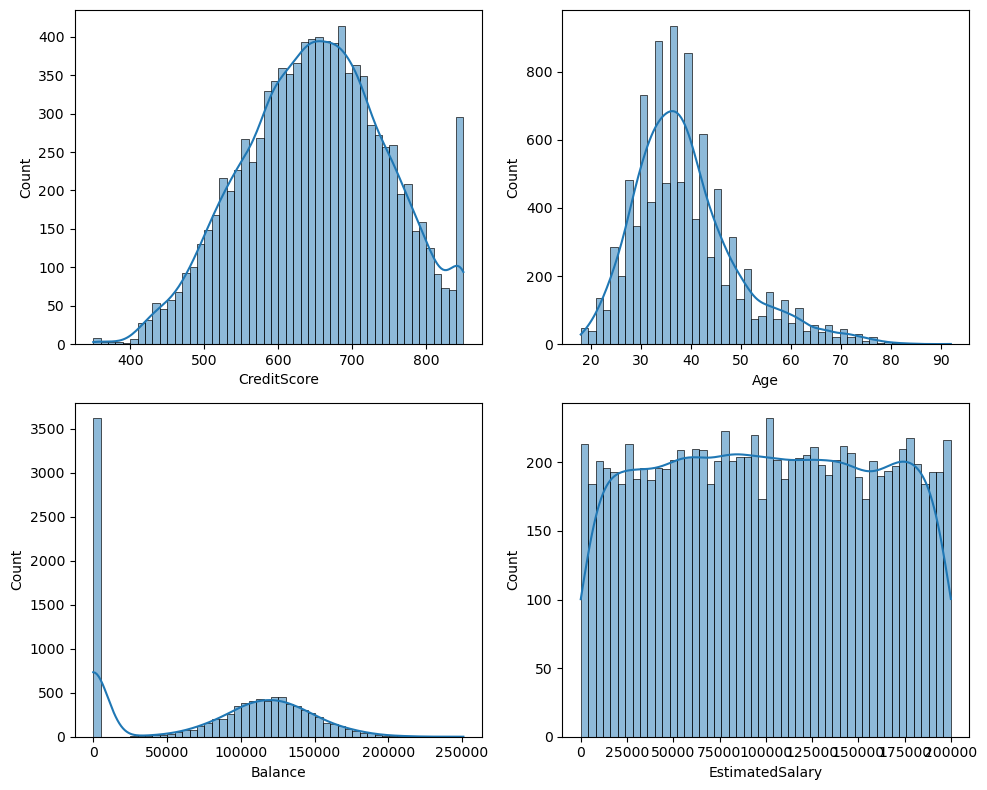

In [10]:
num_cols= ['CreditScore','Age','Balance','EstimatedSalary']
fig, axes = plt.subplots(2,2, figsize=(10,8))
for col, ax in zip(num_cols, axes.flatten()):
    sns.histplot(data=churn_df, x=col, bins=50 ,kde=True, ax=ax)
plt.tight_layout()

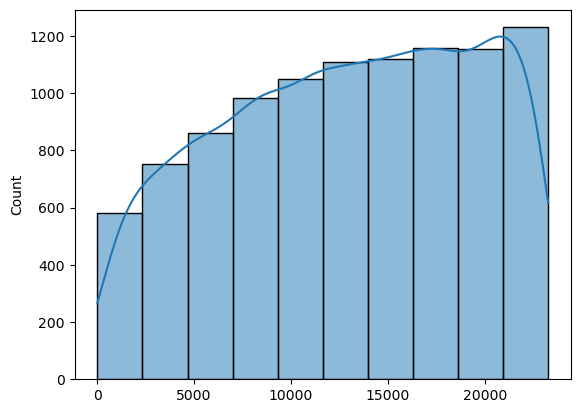

In [11]:
lambda_ = stats.boxcox_normmax(churn_df['EstimatedSalary'])

# Biến đổi dữ liệu
data_boxcox = stats.boxcox(churn_df['EstimatedSalary'], lambda_)
sns.histplot(data_boxcox, bins=10, kde=True);

<Axes: >

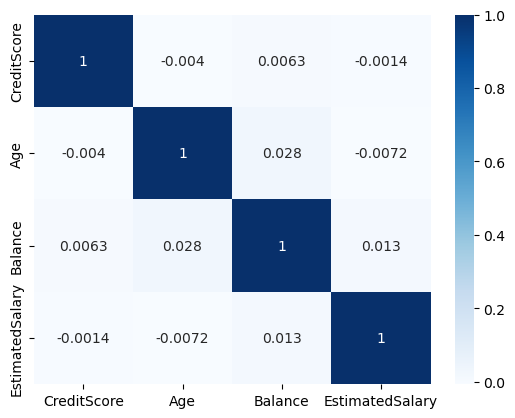

In [12]:
sns.heatmap(churn_df[num_cols].corr(), annot=True, cmap='Blues')

## EDA for Catelogy

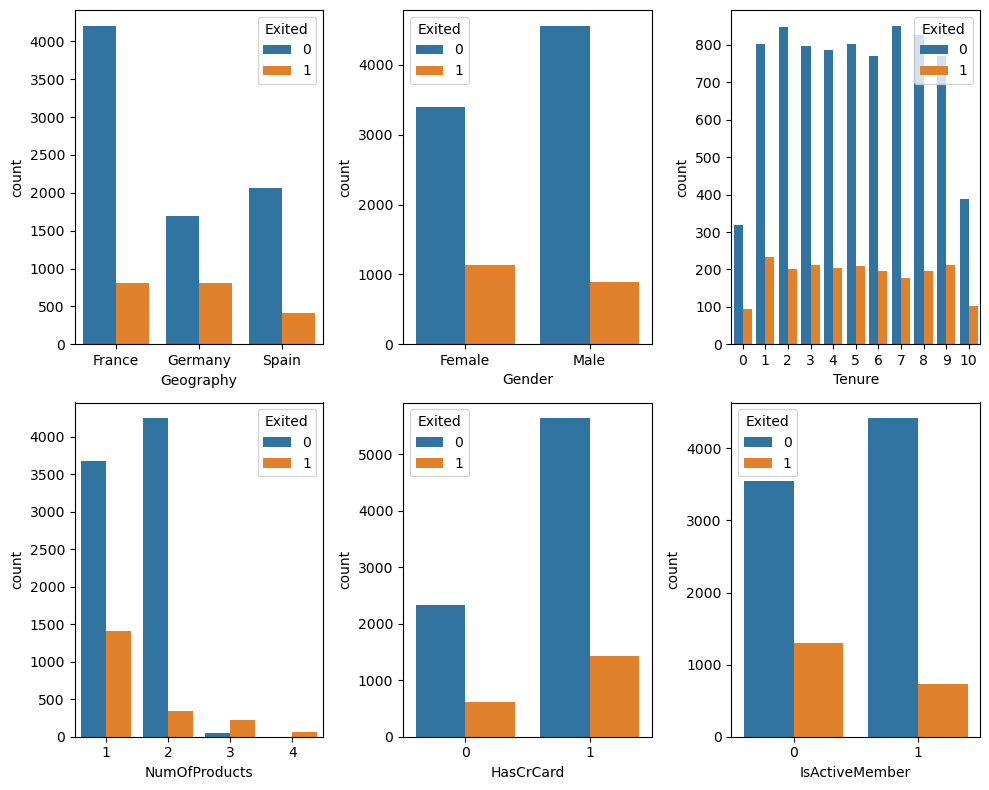

In [13]:
cat_cols= ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']
fig, axes = plt.subplots(2,3, figsize=(10,8))
for col, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=churn_df, hue='Exited', x=col, ax=ax)
plt.tight_layout()

<Axes: xlabel='Geography', ylabel='EstimatedSalary'>

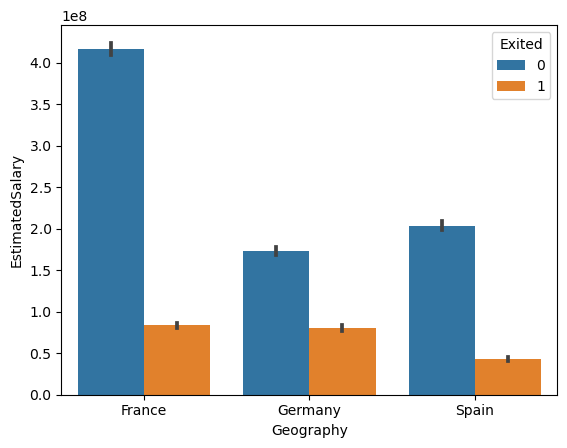

In [32]:
sns.barplot(x=churn_df['Geography'], y=churn_df['EstimatedSalary'], estimator='sum')

<Axes: xlabel='Geography'>

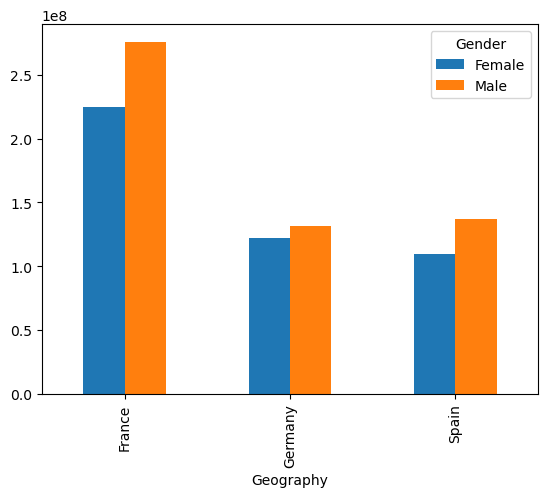

In [30]:
pd.pivot_table(churn_df, index='Geography', values= 'EstimatedSalary', columns='Gender', aggfunc='sum').plot(kind='bar')

## Check Outlier

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(10,8))
for col, ax in zip(num_cols, axes.flatten()):
    sns.boxplot(data=churn_df, x=col, ax=ax)
plt.tight_layout()

## Handle Outlier

In [ ]:
def handle_outlier(features, std_time):
    for feature in features:
        data= churn_df[feature]
        mean_outliers= np.mean(data)
        std_outliers= np.std(data) 
        upper_limit= mean_outliers + std_time*std_outliers
        lower_limit= mean_outliers - std_time*std_outliers
        outliers= data[ (upper_limit <= data) | (lower_limit >= data) ]
        def changeOutlierToMean(x):
            if x in outliers.values:
                return churn_df[feature].mean()
            else:
                return x
        churn_df[feature]= churn_df[feature].apply(changeOutlierToMean)

In [ ]:
handle_outlier(['CreditScore','Age'],2)
handle_outlier(['Age'],3)
fig, axes= plt.subplots(1,2, figsize=(8,6))
for col, ax in zip(['CreditScore','Age'], axes.flatten()):
    sns.boxplot(data=churn_df, x=col, ax=ax)
plt.tight_layout()

## Check Imbalance of Taget Feature

<Axes: xlabel='Exited'>

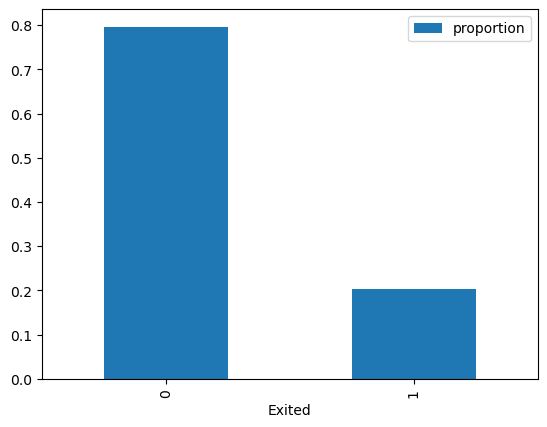

In [33]:
churn_df['Exited'].value_counts(normalize=True).to_frame().plot(kind='bar')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.compose import make_column_transformer

ros = RandomOverSampler()
ohe = OneHotEncoder(handle_unknown='ignore' ,sparse_output=False).set_output(transform='pandas')

In [ ]:
X= churn_df.drop('Exited', axis='columns')
y= churn_df['Exited']

## Encoding

In [ ]:
feature_arr = ohe.fit_transform(X[['Geography','Gender']])
feature_arr = feature_arr.astype('category')
X= pd.concat([X, feature_arr], axis='columns').drop(['Geography','Gender'], axis=1)

In [ ]:
X.info()

## Resample

In [ ]:
X, y = ros.fit_resample(X, y)

In [ ]:
y.value_counts(normalize=True).plot(kind='bar')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import time

dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()


In [ ]:
X.info()

## Compare ML models

In [ ]:
compare_model_df= pd.DataFrame(index= ['accuracy_score','f1_score','recall_score','precision_score'])

models= {'LogisticRegression': LogisticRegression(),
        'RandomForest': RandomForestClassifier(n_estimators=100,random_state= 42),
        'DecisionTree': DecisionTreeClassifier(),
        'GradientBoost':GradientBoostingClassifier(learning_rate=0.01, random_state=42)
        }
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_preds= model.predict(X_test)
    compare_model_df[model_name]= [accuracy_score(y_test, y_preds),f1_score(y_test, y_preds),recall_score(y_test, y_preds),precision_score(y_test, y_preds)]

In [ ]:
compare_model_df

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)

In [ ]:
fi= pd.DataFrame(data=rfc.feature_importances_, index=rfc.feature_names_in_, columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importances')

## Select metaparameter for model

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
start_time = time.time()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
end_time = time.time()
print(end_time - start_time)

In [ ]:
grid_search.best_params_

In [ ]:
rfc = RandomForestClassifier(n_estimators=500,
                             max_depth= None,
                             min_samples_leaf=1,
                             min_samples_split=2,
                             random_state=42)
rfc.fit(X_train,y_train)
y_preds= rfc.predict(X_valid)
print([accuracy_score(y_valid, y_preds),f1_score(y_valid, y_preds),recall_score(y_valid, y_preds),precision_score(y_valid, y_preds)])

In [ ]:
import pickle

In [ ]:
with open('RandomForest_Model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [ ]:
# Tải mô hình từ file
with open('RandomForest_Model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)